<a href="https://colab.research.google.com/github/piyushmways/Decoding-OTT-plateform/blob/main/OTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  A. Introduction
**DATASET:**  The data belongs to a company, which is a leading OTT plateform. They have a global presence and doing good business.


**GOAL OF CASE STUDY:** The purpose of this business case is to delve into the mindset of the OTT audience , aiming to provide valuable insights and recommendations for the creation of new content.

**KEY ASSUMPTION:** We have assumed that the company is already doing great business and thus their strategies are working.

In [15]:
import pandas as pd   #importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
!gdown 18XO8Pbx0zj7DbhNlvkOk8hubERE6OcH5          #loading the dataset
data=pd.read_csv("/content/Projectpandas.csv")

Downloading...
From: https://drive.google.com/uc?id=18XO8Pbx0zj7DbhNlvkOk8hubERE6OcH5
To: /content/Projectpandas.csv
100% 3.40M/3.40M [00:00<00:00, 19.4MB/s]


In [17]:
df=data.copy()     #creating a deep copy to avoid any wanted manupulation in original dataset
pd.set_option('display.max_rows',None)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
df.shape  #checking row and columns

(8807, 12)

In [19]:
df.info()   #checking basic details of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Remarks:
1.   Missing values are present in dataset
2.   Datatypes conversion is required.






# B. Preprocessing

# B.1 Checking the duplicate entries

In [20]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Remarks
1. it may be noted that Dataset do not contains any duplicate entry

# B.2 Missing Value Detection

In [21]:
#percentage of rows that contains missing value
print("Percentage of rows with missing data:",round(100*df.isnull().any(axis=1).sum()/df.shape[0]),"%")

Percentage of rows with missing data: 39 %


Remarks:

      1. The Dataset is not of Good quality.
      2. 39% of entries in dataset are incomplete.
      3. lets try to study nature of missing values to impute them

In [22]:
df.isnull().sum()    #missing values in columns

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [23]:
df.isnull().sum()*100/df.count()  #percentage of nulls in columns

show_id          0.000000
type             0.000000
title            0.000000
director        42.669691
cast            10.335755
country         10.418756
date_added       0.113675
release_year     0.000000
rating           0.045439
duration         0.034075
listed_in        0.000000
description      0.000000
dtype: float64

Remarks

1. It must be noted that most of the features are string.
   
2. The Columns that contains null values are:
    > 1. director Column
    > 2. cast Column
    > 3. country Column
    > 4. date_added Column
    > 5. rating Column
    > 6. duration Column


3. Some features have large number of null values.

# B.3. Missing Value Imputation


1. Missing values Imputations: Rating Column

In [24]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Remarks:
1. It must be noted that **min** can not be a rating, rather it is some mistake lets check the entry.

In [25]:
df[(df['rating'].str.contains('min')) & (df['rating']!=np.nan)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Note:

1. It may be noted that the above 3 row have duration as NaN and rating is in min.

2. It seems that "rating" column is mistaken and filled with "duration" column instead.

3. To correct it, lets fill Nan with enries of rating in duration column and replace "No rating" in rating columns

In [26]:
df.loc[df['duration'].isnull(),'duration']=df.loc[df['duration'].isnull(),'duration'].fillna(df['rating'])
df.loc[df['rating'].str.contains('min', na=False),'rating']='NR' #NR stands for 'NO Rating'

In [27]:
 df.loc[[5813,5541,5794]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [28]:
df['rating'].fillna('NR',inplace=True) #fill nan with NR: No rating

2. Missing value Imputation: date_added Column

In [29]:
from datetime import datetime as dt

In [30]:
##The data type of date_added is str.
#It will be better to convert it into datetime format
df['date_added']=df['date_added'].astype('datetime64[ns]')


df['month_of_upload']=df['date_added'].dt.month #creating year features
df['year_of_upload']=df['date_added'].dt.year

Note:
1. date_added is imputed on basis of mode of corrosponding release year
2. example if release year is 2015 then we will find mode of date_added group of year 2015

In [31]:
for i in df[df['date_added'].isnull()]['release_year'].unique():
    impute=df[df['release_year']==i]['date_added'].mode()[0]
    df.loc[df['release_year']==i,'date_added']=df.loc[df['release_year']==i,'date_added'].fillna(impute)

3. Missing value Imputation: Country column


Technique Used:
1. A actor & director usually releases his movie in his own country.
2. so we can find mode of country for director  and can use for imputation.
3. then we can do the same using actor

In [32]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Remarks:
1. Country name are present as Nested list.
2. we need to find mode of country for each director/cast
3. hence lets unnest in a seperate variable

In [33]:
df1=df[['director','country']].copy()   #creating a seperate variable for calculation of mode.
df1['country']=df1['country'].str.split(', ')
df1.head()

,director,country
0,Kirsten Johnson,[United States]
1,NaN,[South Africa]
2,Julien Leclercq,NaN
3,NaN,NaN
4,NaN,[India]


In [34]:
df1=df1.explode('country')
df1.head()

,director,country
0,Kirsten Johnson,United States
1,NaN,South Africa
2,Julien Leclercq,NaN
3,NaN,NaN
4,NaN,India


In [35]:
df1=df1.dropna()
df1.head()

,director,country
0,Kirsten Johnson,United States
7,Haile Gerima,United States
7,Haile Gerima,Ghana
7,Haile Gerima,Burkina Faso
7,Haile Gerima,United Kingdom


In [36]:
df['country'].isnull().sum()

831

In [37]:
#this will fill some missing values accurately.
for i in df[(df['country'].isnull()) & (~df['director'].isnull())]['director'].unique():
  impute=df1[df1['director']==i]['country'].mode()
  if len(impute)==0:
    pass
  else:
    impute=impute[0]
  df.loc[df['director']==i,'country']=df.loc[df['director']==i,'country'].fillna(impute) ##imputation

In [38]:
df['country'].isnull().sum()

683

Imputation in country column is completed using director. now lets try to impute using counties of actors.

In [39]:
#creating a dataframe df3 to calculate mode of actors
df2=df[['cast','country']].copy()

df2['cast']=df2['cast'].str.split(", ")
df2['country']=df2['country'].str.split(", ")
df2=df2.explode('cast')
df3=df2.explode('country')

In [40]:
#finding list of unique cast in missing entries of original dataframe i.e. df
imp=df[df['country'].isnull() & (~df['cast'].isnull())].index
imp=imp.unique()
imp=df3.loc[imp]['cast'].unique()

In [41]:
len(imp)

3267

In [42]:
df3=df3.dropna()   #removing nulls to reduce computation

In [43]:
for i in imp:
  impute=df3[df3['cast']==i]['country'].mode()  #finding country of actor as mode
  if len(impute)==0:
    pass
  else:
    impute=impute[0]
  df.loc[df['cast'].str.contains(i) & (~df['cast'].isnull()),'country']=df.loc[ (~df['cast'].isnull()) & df['cast'].str.contains(i),'country'].fillna(impute) ##imputation


<ipython-input-43-81df3416cd63>:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['cast'].str.contains(i) & (~df['cast'].isnull()),'country']=df.loc[ (~df['cast'].isnull()) & df['cast'].str.contains(i),'country'].fillna(impute) ##imputation


In [44]:
df['country'].isnull().sum()

250

In [45]:
#if there are still any nulls we can replace by unknown country
df['country'].fillna('unknown country', inplace=True)

4. Missing value Imputation:: Director  & cast column

In [46]:
df.fillna({'director':'unknown director','cast':'unknown cast'},inplace=True)

In [47]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
month_of_upload    10
year_of_upload     10
dtype: int64

# C. Exploratory Data Analysis

In [48]:
red=sns.color_palette()[3] #setting my colors for further analysis

1. **Time Frame of dataset:** First and lastest upload dates

In [49]:
print('starting date:',df['date_added'].min())
print('latest date:',df['date_added'].max())

starting date: 2008-01-01 00:00:00
latest date: 2021-09-25 00:00:00


# C.1 Content wise Exploration

2. What is the ratio of movies and TV shows on the plateform?

In [50]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [51]:
movie_tvshow_ratio=df['type'].value_counts()[0]/df['type'].value_counts()[1]
movie_tvshow_ratio

2.2911061285500747

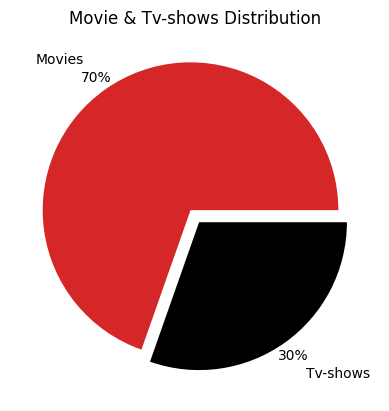

In [52]:
plt.pie(df['type'].value_counts(),labels=['Movies','Tv-shows'],
        colors=[red,"k"],autopct='%.0f%%',explode=(0.05,0.05),pctdistance=1.1,labeldistance=1.25)

plt.title('Movie & Tv-shows Distribution', fontsize=12)
plt.show()

3. Visualize the Distribution of ratings on OTT?

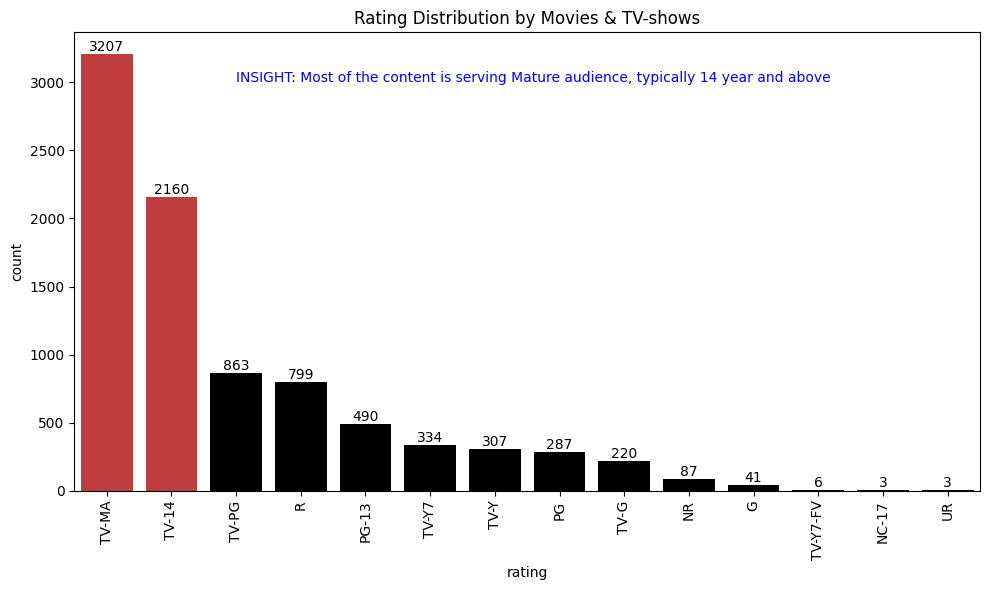

In [53]:
plt.figure(figsize=(10,6))

x=sns.countplot(data=df,x='rating',order=df['rating'].value_counts().index,palette=[red,red,'black','black','black','black','black','black','black','black','black','black','black','black',])
plt.xticks(rotation=90)
plt.bar_label(x.containers[0])
plt.title('Rating Distribution by Movies & TV-shows')
plt.text(x=2,y=3000,s="INSIGHT: Most of the content is serving Mature audience, typically 14 year and above ",color="blue")

plt.tight_layout()
plt.show()

Insights:
1. we have data available from january 2008 to september 2021
2. The ratio of movies to tv_show is 7:3
3. Most of the content is tailored for mature audience typically 14 year and above.

**4. Visulaize uploading pattern**




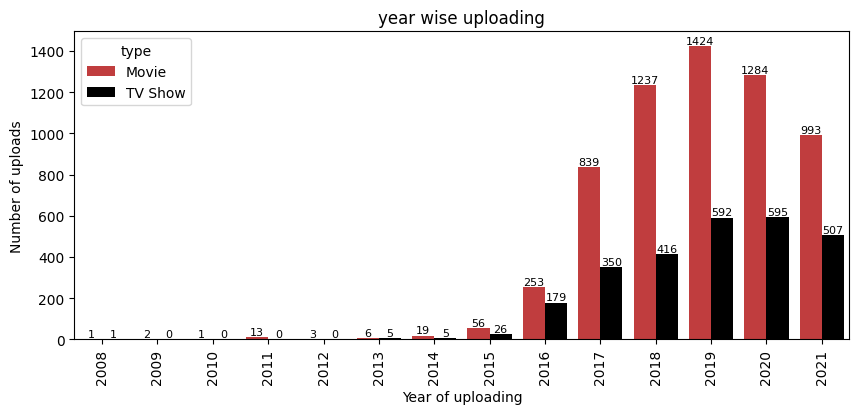

In [54]:
plt.figure(figsize=(10,4))


x=sns.countplot(data=df,x=df['date_added'].dt.year,palette=[red,"black"],hue='type')
plt.xticks(rotation=90)
plt.xlabel('Year of uploading')
plt.ylabel('Number of uploads')
plt.bar_label(x.containers[0],fontsize=8)
plt.bar_label(x.containers[1],fontsize=8)
plt.title('year wise uploading')

plt.show()

**5. How content has been added over the years**

In [55]:
df['month_of_upload']=df['date_added'].dt.month
df['year_of_upload']=df['date_added'].dt.year

In [56]:
from datetime import datetime as dt
df['month_year']=df['date_added'].dt.strftime("%Y-%m")

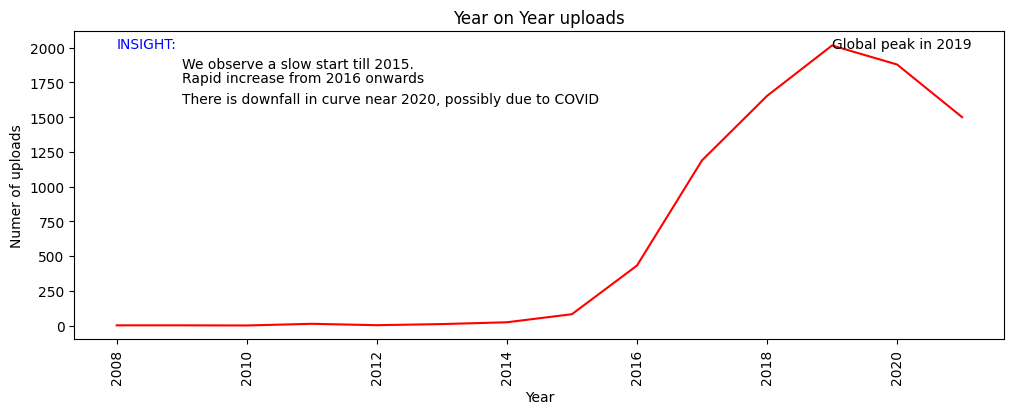

In [57]:
plt.figure(figsize=(12,4))
upload_per_year=df.groupby(by=["year_of_upload"])['type'].count()


y=sns.lineplot(y=upload_per_year.values,x=upload_per_year.index,color='red')
plt.xticks(rotation=90)
plt.title('Year on Year uploads')
plt.xlabel('Year')
plt.ylabel('Numer of uploads')
plt.annotate('Global peak in 2019',xy=(2019,2000))
plt.annotate('INSIGHT:',xy=(2008,2000),color='blue')
plt.annotate('We observe a slow start till 2015.',xy=(2009,1850))
plt.annotate('Rapid increase from 2016 onwards',xy=(2009,1750))
plt.annotate('There is downfall in curve near 2020, possibly due to COVID',xy=(2009,1600))

plt.show()

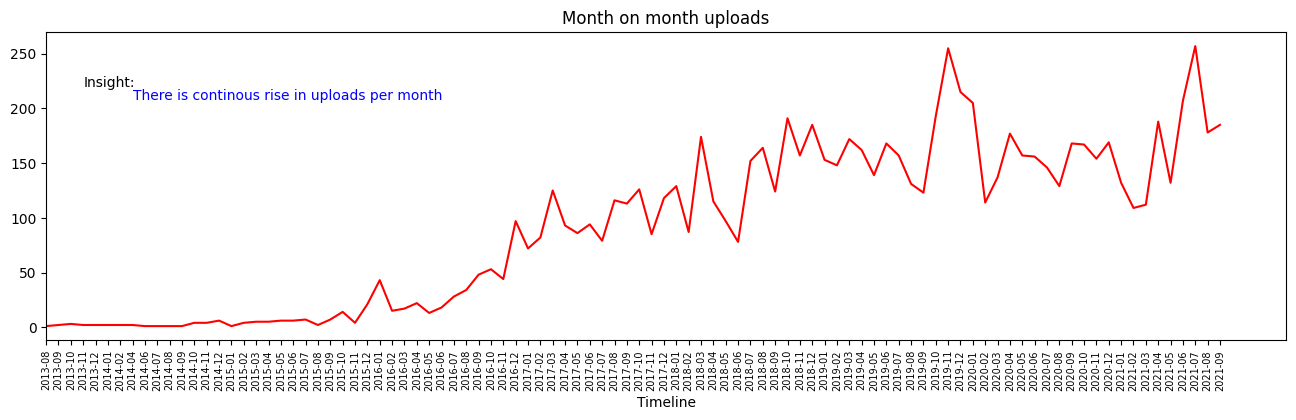

In [58]:
plt.figure(figsize=(16,4))

upload_per_month=df.groupby(by=['month_year'])['type'].count()
x=sns.lineplot(y=upload_per_month.values,x=upload_per_month.index,color='red')
plt.xticks(rotation=90)
plt.xlim(left=12)
plt.title('Month on month uploads')
plt.xticks(fontsize=7)
plt.xlabel('Timeline')

#Annotations
plt.annotate('Insight:',xy=(15,220))
plt.annotate('There is continous rise in uploads per month',xy=(19,208),color='blue')

plt.show()

In [59]:
df.rename(columns={'listed_in':'genre'},inplace=True)

In [60]:
df4=df[['country','genre']].copy()
df4['genre']=df4['genre'].str.split(", ")
df4=df4.explode('genre')
df4.head()

,country,genre
0,United States,Documentaries
1,South Africa,International TV Shows
1,South Africa,TV Dramas
1,South Africa,TV Mysteries
2,France,Crime TV Shows


**Insights:**
4. OTT platform got significant uploads from 2016 onwards.
5. There is continous rise in number of uploads, although 2019 got most uploads which might be because of covid-19 breakout & lockdowns.
6. The number of uploads per months since 2016 onwards are continously rising with peak in 2019. (note: year 2021 have data of 9 months only)

---



**6. What is the common duration of movies?**

Issue:
1. First issue here is duration is not numerical--> we can remove words like min,seasons
2. For effective visualisation, we need to create bins of duration.

In [61]:
df['duration']=df['duration'].str.replace(' min','')
df['duration']=df['duration'].str.replace(' Seasons','')
df['duration']=df['duration'].str.replace(' Season','')


In [62]:
df['duration']=df['duration'].astype('int64')  #converting the datatype to integer

In [63]:
print('maximum duration of movies: ',df[df['type']=="Movie"]['duration'].max())
print('minimum duration of movies: ',df[df['type']=='Movie']['duration'].min())

maximum duration of movies:  312
minimum duration of movies:  3


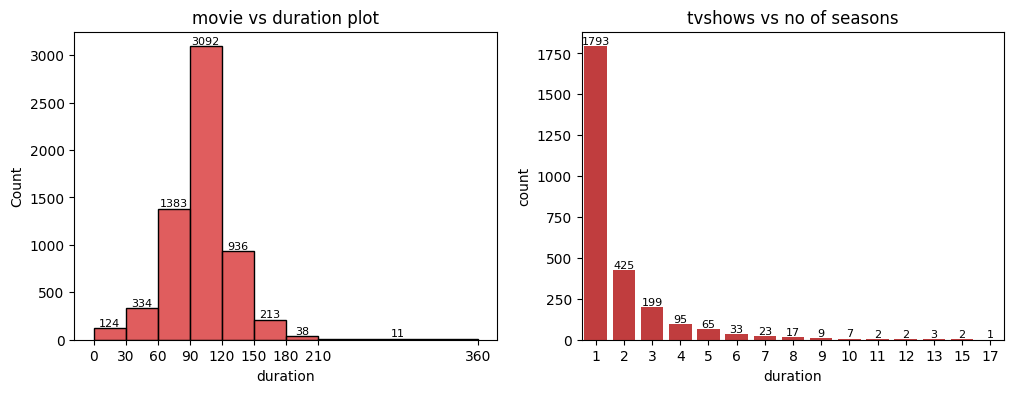

In [64]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
bin=[0,30,60,90,120,150,180,210,360]
x=sns.histplot(data=df[df['type']=='Movie'],x='duration',bins=bin,color=red)
x.bar_label(x.containers[0],fontsize=8)
plt.xticks(ticks=bin)
plt.title('movie vs duration plot')


plt.subplot(1,2,2)
x=sns.countplot(data=df[df['type']=='TV Show'],x='duration',color=red)
x.bar_label(x.containers[0],fontsize=8)
plt.title('tvshows vs no of seasons')
plt.show()

**7. Identify the countries with most content?**

In [65]:
top_countries=df1['country'].value_counts()[:5].index        #top 5 countries with most content/business

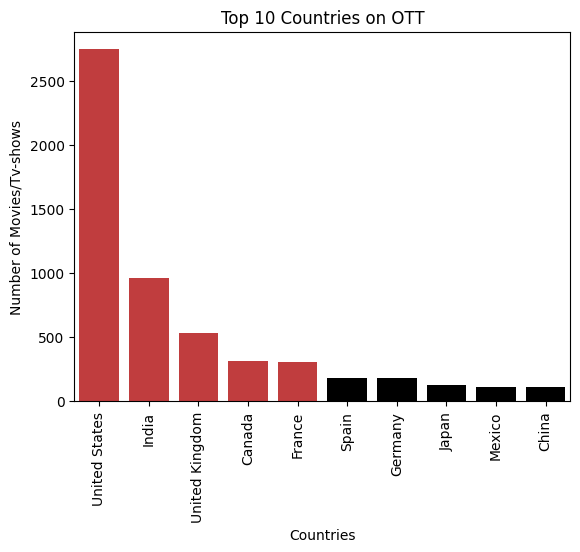

In [66]:
sns.barplot(x=df1['country'].value_counts().index[:10],y=df1['country'].value_counts().values[:10],palette=[red,red,red,red,red,'k','k','k','k','k'])
plt.xticks(rotation=90)
plt.ylabel('Number of Movies/Tv-shows')
plt.xlabel('Countries')
plt.title('Top 10 Countries on OTT')
plt.show()

**8. What are the Most frequent genre ?**


In [67]:
genres=df['genre'].copy()
genres=genres.str.split(", ")    #we have to unnest the series and explode.
genres=genres.explode()

In [68]:
genres.nunique()

42

In [69]:
genres.value_counts()[:10]   ##top 10 genres

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: genre, dtype: int64

In [70]:
genres.value_counts()[-10:-1]    #bottom 10 genres

TV Horror                       75
Anime Features                  71
Cult Movies                     71
Teen TV Shows                   69
Faith & Spirituality            65
TV Thrillers                    57
Movies                          57
Stand-Up Comedy & Talk Shows    56
Classic & Cult TV               28
Name: genre, dtype: int64

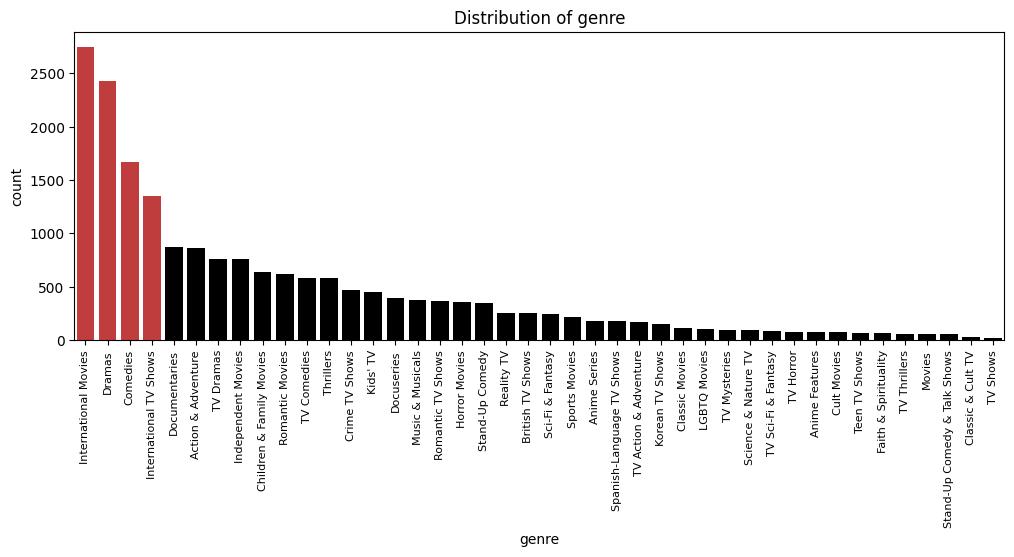

In [71]:
plt.figure(figsize=(12,4))

list_color=[]  #creating a list for colors
for i in range(42):
  if i<4:
    list_color.append(red)
  else:
    list_color.append('black')

#plot
x=sns.countplot(data=df4,x='genre',order=df4['genre'].value_counts().index,palette=list_color)
plt.xticks(rotation=90,fontsize=8)
plt.title('Distribution of genre')
plt.show()

# C.2 Rising Choice of Genre

In [72]:
df5=df[['country','genre','year_of_upload']].copy()
df5['country']=df5['country'].str.split(", ")
df5['genre']=df['genre'].str.split(", ")
df5=df5.explode('country')
df5=df5.explode('genre')
shift_analysis=df5.groupby(['genre','year_of_upload']).count().reset_index()
shift_analysis.rename(columns={'country':'uploads'},inplace=True)
shift_analysis['lagged1']=shift_analysis.groupby('genre')['uploads'].shift(1)
shift_analysis['lagged2']=shift_analysis.groupby('genre')['uploads'].shift(2)
shift_analysis['lagged3']=shift_analysis.groupby('genre')['uploads'].shift(3)

#genre preference which is rising continously since last 3 consecutive years
shift_analysis[(shift_analysis['year_of_upload']==2021) & ((shift_analysis['uploads']>shift_analysis['lagged1']) &
 ((shift_analysis['lagged1']>shift_analysis['lagged2']) & (shift_analysis['lagged2']>shift_analysis['lagged3'])))]

,genre,year_of_upload,uploads,lagged1,lagged2,lagged3
13,Anime Features,2021,24,17.0,14.0,8.0


Insights:
7. Generally movies with duration 90-120 were preffered.
8. Tv-shows with many seasons were not preffered hence tv-shows should not have more than 3-4 seasons.
9. It can be observed that United States is the most important country followed by India, United kingdom, Canada, France
10. genres such as Classic & cult tv,stand-up comedy were least preffered at the plateform. although it may be noted that stand-up comedy is the recently appeared genre.
11. Genres like International movies/tv-show, Drama, comedy, action & Adventure and Documentries were most preffered.


---



# C.3 Exploring top Countries for New content creation

**9. Who are the top directors in top 5 countries.**


lets explore the OTT plateform country wise. we will limit our exploration to top 5 countries (in terms of Business)

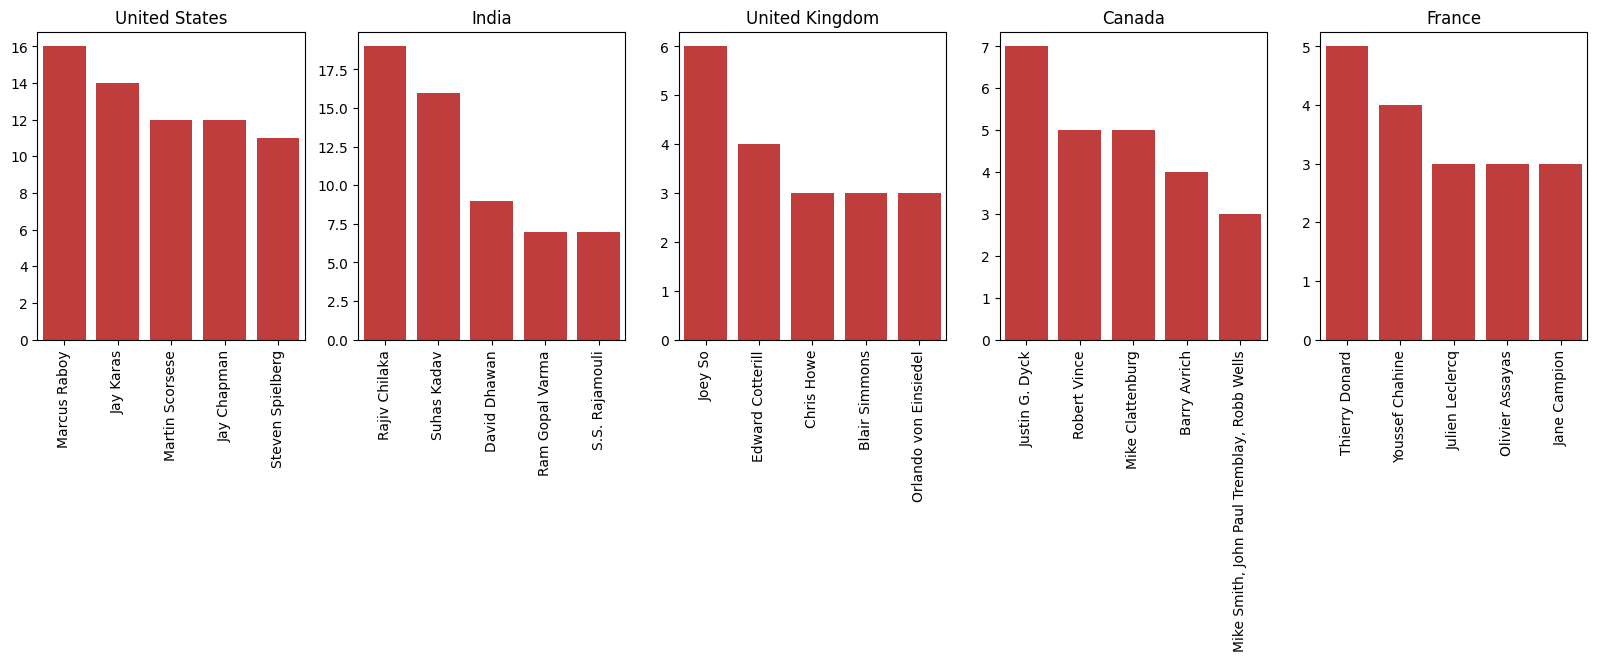

In [73]:
plt.figure(figsize=(20,4))
j=0
for i in top_countries:
  j=j+1
  top_5_directors=df[df['country'].str.contains(i)]['director'].value_counts()[1:6]  #at 0 index, we have unknown director, hence ignoring it
  plt.subplot(1,5,j)
  sns.barplot(x=top_5_directors.index,y=top_5_directors.values,color=red)
  plt.xticks(rotation=90)
  plt.title(i)

plt.show()

In [74]:
top_5_directors

Thierry Donard     5
Youssef Chahine    4
Julien Leclercq    3
Olivier Assayas    3
Jane Campion       3
Name: director, dtype: int64

**10. Who are the top 5 actors in top 5 business countries.**

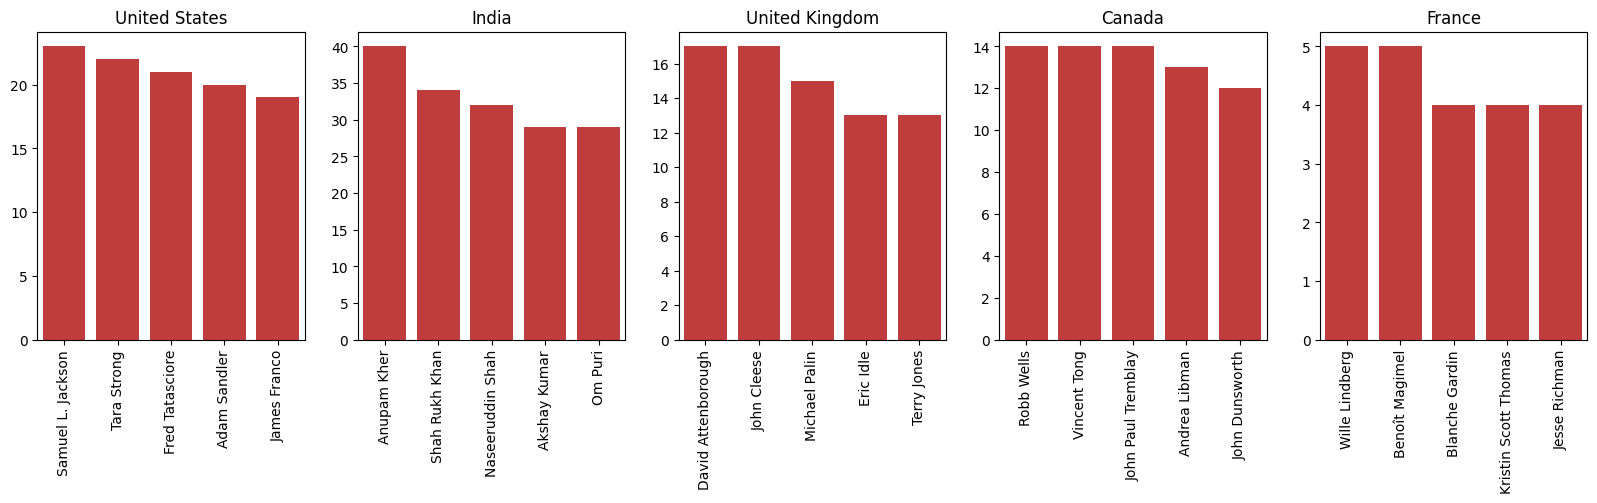

In [75]:
plt.figure(figsize=(20,4))
j=0
for i in top_countries:
  j=j+1
  top_5_cast=df3[df3['country'].str.contains(i)]['cast'].value_counts()[:5]

  plt.subplot(1,5,j)
  sns.barplot(x=top_5_cast.index,y=top_5_cast.values,color=red)
  plt.xticks(rotation=90)
  plt.title(i)


plt.show()

**11. what are top 3 genres in the top 5 countries?**

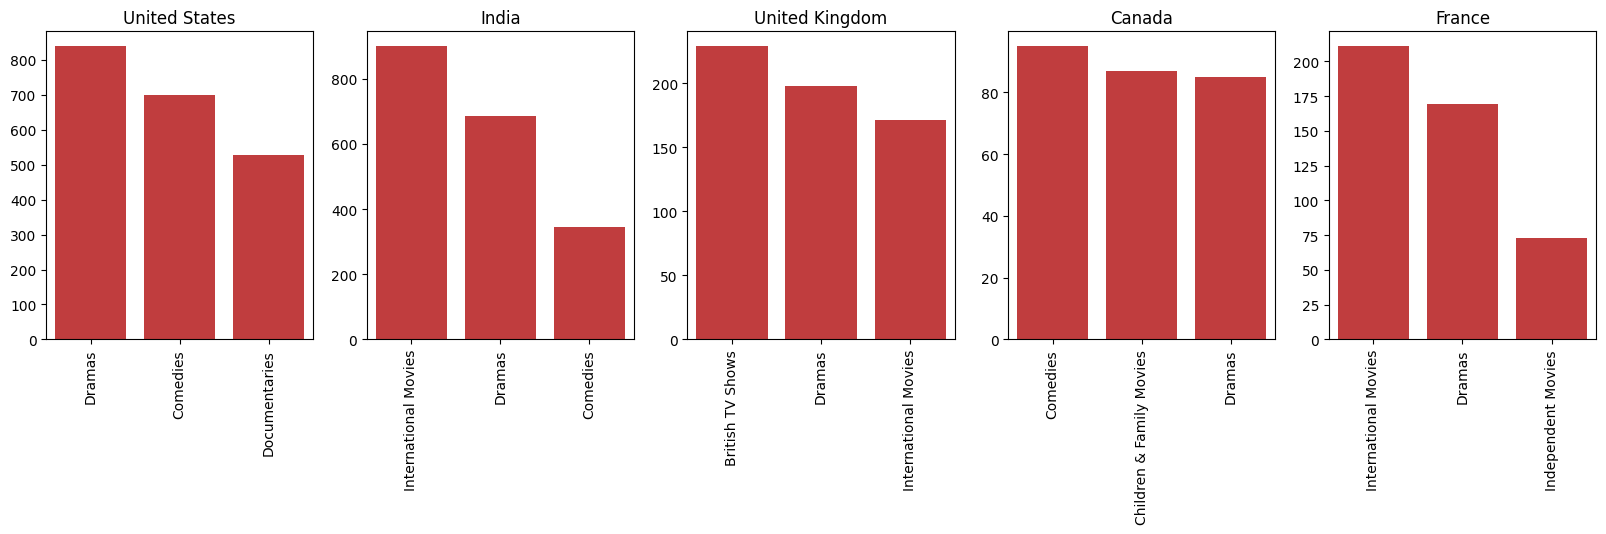

In [76]:
plt.figure(figsize=(20,4))
j=0
for i in top_countries:
  j=j+1
  top_3_genre=df4[df4['country'].str.contains(i)]['genre'].value_counts()[:3]

  plt.subplot(1,5,j)
  sns.barplot(x=top_3_genre.index, y=top_3_genre.values,color=red)
  plt.xticks(rotation=90)
  plt.title(i)


plt.show()



Insights:

12. Top 5 Directors in United States are
                                  1. 'Marcus Raboy'
                                  2. 'Jay Karas'
                                  3. 'Martin Scorsese'
                                  4. 'Jay Chapman'
                                  5. 'Steven Spielberg'
13. Top 5 cast in United States are
                                  1. Samuel L. Jackson
                                  2. Tara Strong
                                  3. Fred Tatasciore
                                  4. Adam Sandler
                                  5. James Franco  
14. Top 3 Genres in United States Index 'Dramas', 'Comedies', 'Documentaries'
15. Top 5 Directors in India are
                                1. 'Rajiv Chilaka'  
                                2. 'Suhas Kadav'
                                3. 'David Dhawan'
                                4. 'Ram Gopal Varma'
                                5. 'S.S. Rajamouli'
16. Top 5 cast in India are
                              1. Anupam Kher
                              2. Shah Rukh Khan
                              3. Naseeruddin Shah
                              4. Akshay Kumar
                              5. Om Puri
17. top Genre in India are 'International Movies', 'Dramas', 'Comedies'
18. Top 5 Directors in United Kingdom are
                                      1. 'Joey So'
                                      2. 'Edward Cotterill'
                                      3. 'Chris Howe'
                                      4. 'Blair Simmons'
                                      5. 'Orlando von Einsiedel'
19. Top 5 cast in United Kingdom are
                                  1. David Attenborough
                                  2. John Cleese
                                  3. Michael Palin
                                  4. Eric Idle
                                  5. Terry Jones
20. Top genre in United Kingdom are'British TV Shows', 'Dramas','International Movies'

21. Top 5 Directors in Canada are
                                1. 'Justin G. Dyck'
                                2. 'Robert Vince'
                                3. 'Mike Clattenburg'
                                4. 'Barry Avrich'
                                5. 'Mike Smith
22. Top 5 cast in Canada are
                            1. Robb Wells
                            2. Vincent Tong
                            3. John Paul Tremblay
                            4. Andrea Libman
                            5. John Dunsworth
23. Top Genre in Canada are 'Comedies', 'Children & Family Movies', 'Dramas'
24. Top 5 Directors in France
                            1. 'Thierry Donard'
                            2. 'Youssef Chahine'
                            3. 'Julien Leclercq'
                            4. 'Olivier Assayas'
                            5. 'Jane Campion'  
25. Top 5 cast in France are
                          1. Wille Lindberg
                          2. Benoît Magimel
                          3. Blanche Gardin
                          4. Kristin Scott Thomas
                          5. Jesse Richman
26. Top Genre in France are 'International Movies', 'Dramas', 'Independent Movies'

27. It may be noted that American continent countries Like US, Canada do not consume International content unlike other non american countries.


**12. Visulaize upload per month trend in these top countries**

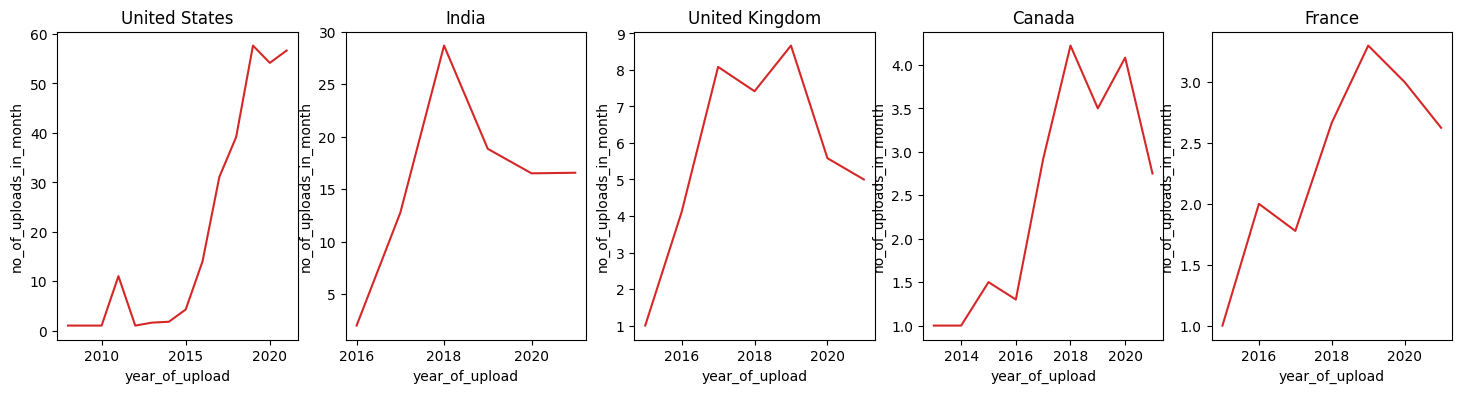

In [79]:
plt.figure(figsize=(18,4))
j=0
for i in top_countries:
  j=j+1
  plt.subplot(1,5,j)
  sns.lineplot(data=df[df['country']==i].groupby(by=["year_of_upload","month_of_upload"])['title'].count().reset_index(),
               x='year_of_upload',y='title',color=red,errorbar=None)
  plt.title(i)
  plt.ylabel('no_of_uploads_in_month')

plt.show()


Insights
28. Number of uploads are significantly very high in US and India as compared to any other country.
29. Number of uploads are steadly increasing in United States.
30. In India, number of uploads made peak in 2018 and then almost halved.
31. In United Kingdom, number of uploads made 2 peaks in 2017 & 2019
32. In Canada, number of uploads made 2 peaks
33. In France, number of uploads made 2 peaks

# D. List of Insights

**D.1 Insights:**

---

1. The dataset spans from January 2008 to September 2021.
2. The content ratio between movies and TV shows is 7:3.
3. Common content ratings on the OTT platform include TV-MA and TV-14.
4. Significant uploads on the OTT platform started gaining momentum from 2016 onwards.
5. There is a continuous increase in uploads, notably peaking in 2019, possibly influenced by the COVID-19 breakout and lockdowns.
6. Monthly uploads have been consistently rising since 2016, reaching a peak in 2019 (note: data for 2021 covers only 9 months).
7. Preference is given to movies with a duration of 90-120 minutes.
8. TV shows with numerous seasons are less favored, with a suggested limit of 3-4 seasons.
9. The most crucial countries for content consumption are the United States, followed by India, the United Kingdom, Canada, and France.
10. Less preferred genres on the platform include Classic & Cult TV and Stand-up Comedy, the latter being a relatively recent addition.
11. Most preferred genres encompass International Movies/TV shows, Drama, Comedy, Action & Adventure, and Documentaries.
12. Top 5 Directors in the United States:
*   'Marcus Raboy'
*   'Jay Karas'
*   'Martin Scorsese'
*   'Jay Chapman'
* 'Steven Spielberg'

13. Top 5 Cast in the United States:
* Samuel L. Jackson
* Tara Strong
* Fred Tatasciore
* Adam Sandler
* James Franco
14. Top 3 Genres in the United States:
* 'Dramas'
* 'Comedies'
* 'Documentaries'.
15. Top 5 Directors in India:
* 'Rajiv Chilaka'
* 'Suhas Kadav'
* 'David Dhawan'
* 'Ram Gopal Varma'
* 'S.S. Rajamouli'
16. Top 5 Cast in India:
* Anupam Kher
* Shah Rukh Khan
* Naseeruddin Shah
* Akshay Kumar
* Om Puri
17. Top Genres in India are
* 'International Movies'
* 'Dramas'
* 'Comedies'.
18. Top 5 Directors in the United Kingdom:
* 'Joey So'
* 'Edward Cotterill'
* 'Chris Howe'
* 'Blair Simmons'
* 'Orlando von Einsiedel'
19. Top 5 Cast in the United Kingdom:
* David Attenborough
* John Cleese
* Michael Palin
* Eric Idle
* Terry Jones
20. Top Genre in the United Kingdom:
* 'British TV Shows'
* 'Dramas',
* 'International Movies'.
21. Top 5 Directors in Canada:
* 'Justin G. Dyck'
* 'Robert Vince'
* 'Mike Clattenburg'
* 'Barry Avrich'
* 'Mike Smith'
22. Top 5 Cast in Canada:
* Robb Wells
* Vincent Tong
* John Paul Tremblay
* Andrea Libman
* John Dunsworth
23. Top Genres in Canada:
* 'Comedies',
* 'Children & Family Movies',
* 'Dramas'.
24. Top 5 Directors in France:
* 'Thierry Donard'
* 'Youssef Chahine'
* 'Julien Leclercq'
* 'Olivier Assayas'
* 'Jane Campion'
25. Top 5 Cast in France:
* Wille Lindberg
* Benoît Magimel
* Blanche Gardin
* Kristin Scott Thomas
* Jesse Richman
26. Top Genres in France:
* 'International Movies',
* 'Dramas',
* 'Independent Movies'.
27. Notably, countries in the American continent like the US and Canada show less interest in International content compared to other non-American countries.
28. The number of uploads is significantly higher in the US and India compared to other countries.
29. The number of uploads in the United States is steadily increasing.
30. In India, the number of uploads peaked in 2018 and then almost halved.
31. In the United Kingdom, the number of uploads peaked twice in 2017 and 2019.
32. In Canada, the number of uploads peaked twice in 2017 and 2020.
33. In France, the number of uploads peaked twice in 2016 and 2019.

# Recommendations:

Note: All the recommendations are based on assumption that this OTT plateform had done good business and their strategies are already proven.

---



1. Audience preffers to watch movies more than tv-shows. hence movies should be preffered over tv-shows for new content creation.
2.  New content need to cater audience typically 14 year and above as they are major audience using OTT.
3. number of movies uploads are continously increasing across the OTT which signifies that OTT market are not yet saturated and have potential for more oppurtunity.
4. While making new movies, duration should be around 90-120 minutes.
5. while making new shows, maximum seasons should not be more than 4.
6. For making new content, Drama, comedy, action & Adventure and Documentries should be preffered genres. whereas content creator should be careful while dealing with Classic & cult tv,stand-up comedy genres.
7. Animation movies have clear rising prefernce hence considerable choice of genre for new content.
7. US, India are important countries for content creation followed by United kingdom, canada and France.
8. American audience do not preffers International movies although they are preffered in India, Britain and France. Hence american movies can be distributed to such contries.
10. There is fall in uploads in every other country except United states. hence there is some risk involved with these countries.  



